In [1]:
from shine import AdvectionSolver, initial_conditions
from functools import partial
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def square(x, y, z, bounds=(0, 1)):
    return (bounds[1] - bounds[0]) * np.where(
        np.logical_and(np.abs(x - 0.5) < 0.25, np.abs(y - 0.5) < 0.25), 1, 0
    ) + bounds[0]


solver = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1, vy=1),
    ic_passives={
        "passive1": square,
        "passive2": partial(square, bounds=(1.5, 2.5)),
        "passive3": partial(square, bounds=(-10, 10)),
    },
    nx=64,
    ny=64,
    nz=1,
    p=7,
)

solver.run(1)

100%|██████████| 1.0/1.0 [00:03]                 


/Users/jonathan/Desktop/shine/shine/visualization.py:32: UserWarning: Coordinate 0.25 not found in array. Using nearest: 0.2421875.
  warnings.warn(
/Users/jonathan/Desktop/shine/shine/visualization.py:32: UserWarning: Coordinate 0.75 not found in array. Using nearest: 0.7421875.
  warnings.warn(
/Users/jonathan/Desktop/shine/shine/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.4921875.
  warnings.warn(


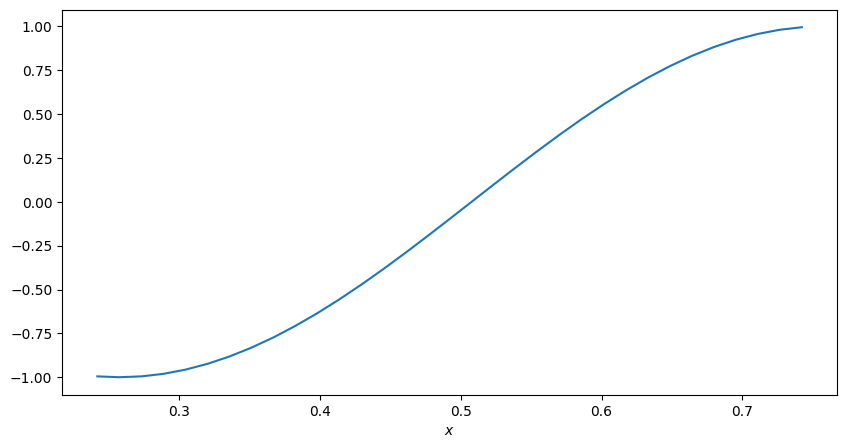

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver.plot_1d_slice(ax, "rho", x=(0.25, 0.75))

/Users/jonathan/Desktop/shine/shine/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.4921875.
  warnings.warn(
/Users/jonathan/Desktop/shine/shine/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.4921875.
  warnings.warn(


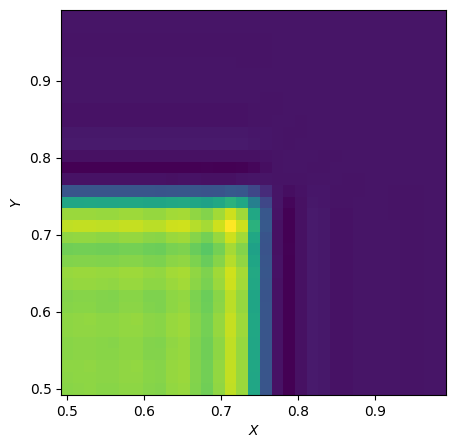

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
solver.plot_2d_slice(ax, "passive1", x=(0.5, None), y=(0.5, None))

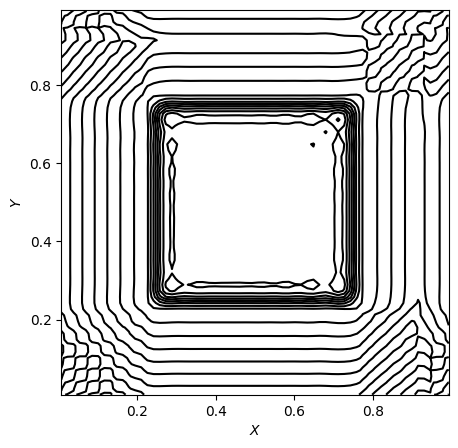

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
solver.plot_2d_slice(ax, "passive1", x=None, y=None, levels=10, colors="k")